------
<h1>
    <center>
        Preprocessing of Provided Data<br><br>Second Batch<br>
    </center>
</h1>

------


## Imports of Required Packages

In [2]:
import os
import sys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


## Explore Availavle Data for Ibadan Campaign

The motivation of choosing data for city is due to the fact that the settlement type data obtained from the ground study are not imbalanced like in the cases of Kano and Ilorin cities. This means a specific settlement types (informa, formal or slum) is not dominant in the data.

In [9]:
fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_fiveLGAshapes/Ibadan_metro_fiveLGAshapes.shp"
ib_lga1 = gpd.read_file(fname)

fname = "../data-in/NGA/kano_ibadan_shape_files/Ibadan_metro_ward_fiveLGAs/Ibadan_metro_fiveLGAs.shp"
ib_lga2 = gpd.read_file(fname)


In [11]:
ib_lga1.head()


,LGACode,LGAName,StateCode,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,31006,Ibadan North,OY,eHA_Polio,2019-08-09,fb782fd3-1a49-4bfa-9a64-c9561cc1c0bc,NIE OYS BDJ,"POLYGON ((3.89913 7.37960, 3.89888 7.37942, 3...."
1,31007,Ibadan North East,OY,WHO,2019-08-09,60dae0a9-7b69-47e9-9024-1e425fb61499,NIE OYS AGG,"POLYGON ((3.92804 7.39108, 3.92817 7.39105, 3...."
2,31008,Ibadan North West,OY,WHO,2019-08-09,818501be-e639-4414-b2df-ca32662cde7b,NIE OYS NRK,"POLYGON ((3.89160 7.37727, 3.89155 7.37730, 3...."
3,31009,Ibadan South East,OY,WHO,2019-08-09,0b8e1f11-70dc-4d07-9e56-a3151064449d,NIE OYS MAP,"POLYGON ((3.91557 7.34398, 3.91434 7.34378, 3...."
4,31010,Ibadan South West,OY,WHO,2019-08-09,0121db2a-0d0a-4d7b-a471-3cdb3264efa3,NIE OYS LUY,"POLYGON ((3.88016 7.34939, 3.87926 7.34826, 3...."


In [12]:
ib_lga2.head()


,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
3,OY,OYSINE09,Oja Gbo,31007,Yes,INEC,2019-03-16,5ebd3bb8-f111-495e-8055-2f3fd9f83906,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90998 7.38441, 3...."
4,OY,OYSINE05,Basorun,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."


### Visualize Ibadan City Divisions

#### Division names at the LGA level

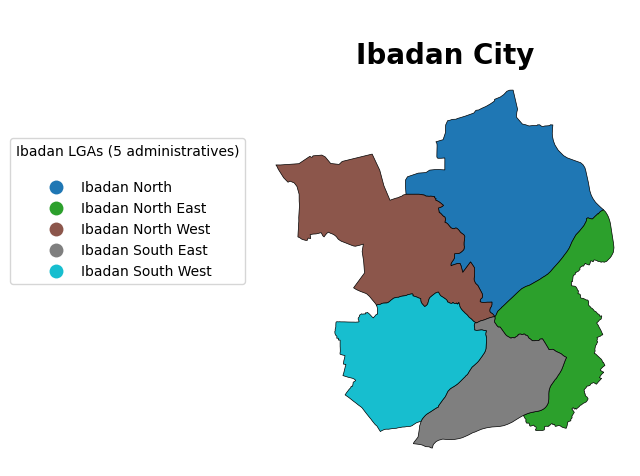

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
ib_lga1.plot(ax=ax, column="LGAName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 1,
                           "title": f"Ibadan LGAs ({ib_lga1.LGAName.unique().size} administratives)\n"},
             cmap="tab10", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


#### Division names at the Ward level

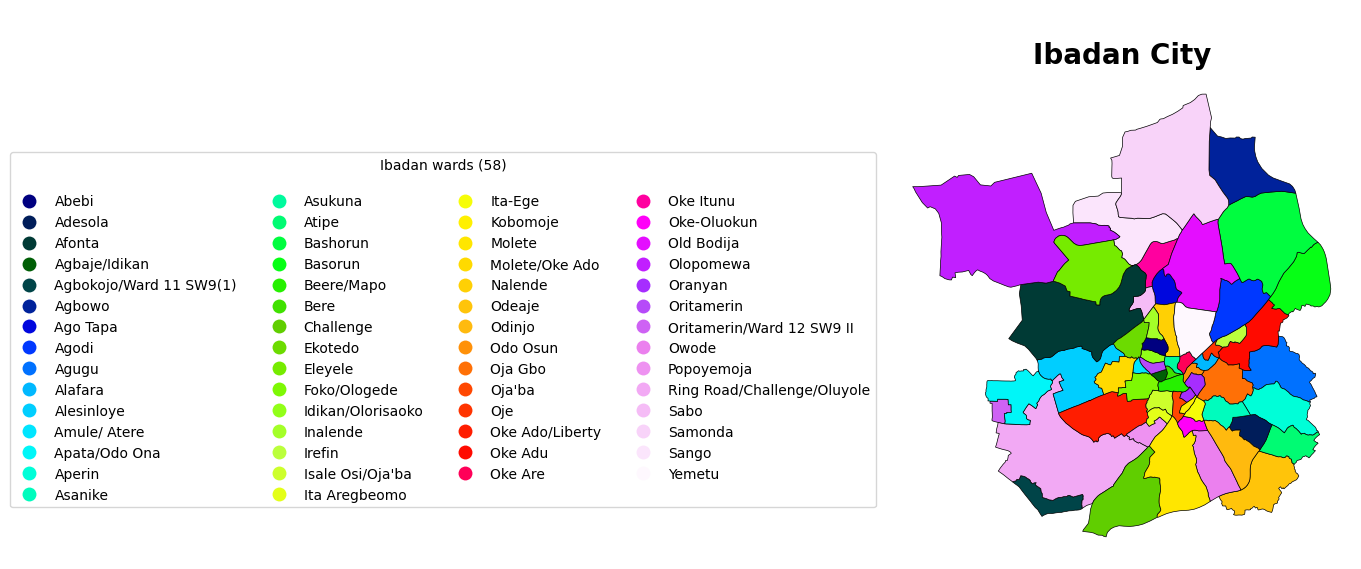

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
ib_lga2.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Ibadan wards ({ib_lga2.WardName.unique().size})\n",},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


#### Remarks

Apparently instead of 58 Wards as shown in the plot above, there was supposed to be 59 Wards in Ibadan. In the following cells, we are going to find out where the one missing or duplicated ward is. 

In [28]:
ib_lga2.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   StateCode  59 non-null     object  
 1   WardCode   59 non-null     object  
 2   WardName   59 non-null     object  
 3   LGACode    59 non-null     object  
 4   Urban      59 non-null     object  
 5   Source     59 non-null     object  
 6   Timestamp  59 non-null     object  
 7   GlobalID   59 non-null     object  
 8   AMAPCODE   59 non-null     object  
 9   geometry   59 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 4.7+ KB


In [29]:
len(ib_lga2.WardName.unique())


58

From the outputs of the two cells above, we can that there are **59 entries**, but surprisingly there the `WardName` column has 58 names, which implies there may is a duplicated entry for that column. 

In [30]:
### Make a function to find the duplicated entries in a column
from collections import Counter, defaultdict

def duplicates(lst):
    cnt= Counter(lst)
    return [key for key in cnt.keys() if cnt[key]> 1]

def indices(lst, items= None):
    items, ind= set(lst) if items is None else items, defaultdict(list)
    for i, v in enumerate(lst):
        if v in items: ind[v].append(i)
    return ind


In [33]:
### Call our function 1
ward = ib_lga2.WardName.to_list()
indices(ward, duplicates(ward))


defaultdict(list, {'Oranyan': [6, 50]})

From the cell above, we can see the ward called **Oranyan** is duplicated in entries 6 and 50 of the ward culumn as confirmed by the result of the cell below.

In [34]:
df = ib_lga2[ib_lga2.WardName == "Oranyan"]
df


,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
6,OY,OYSINE12,Oranyan,31007,Yes,INEC,2019-03-16,b711ac97-377d-451d-8e5c-8e10224de2af,NIE OYS AGG,"POLYGON ((3.90143 7.37999, 3.90159 7.37989, 3...."
50,OY,OYSISE11,Oranyan,31009,Yes,INEC,2019-09-26,18c54b41-8e50-4691-a438-6158293fd4a0,NIE OYS MAP,"POLYGON ((3.90173 7.37208, 3.90127 7.37178, 3...."


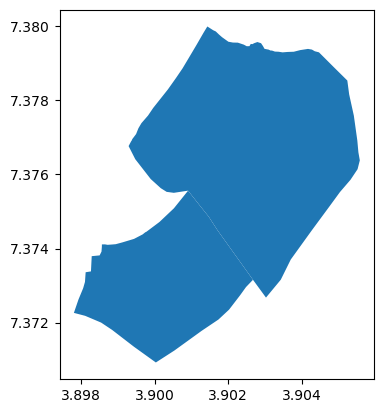

In [36]:
df.plot();


#### LGA and Ward levels

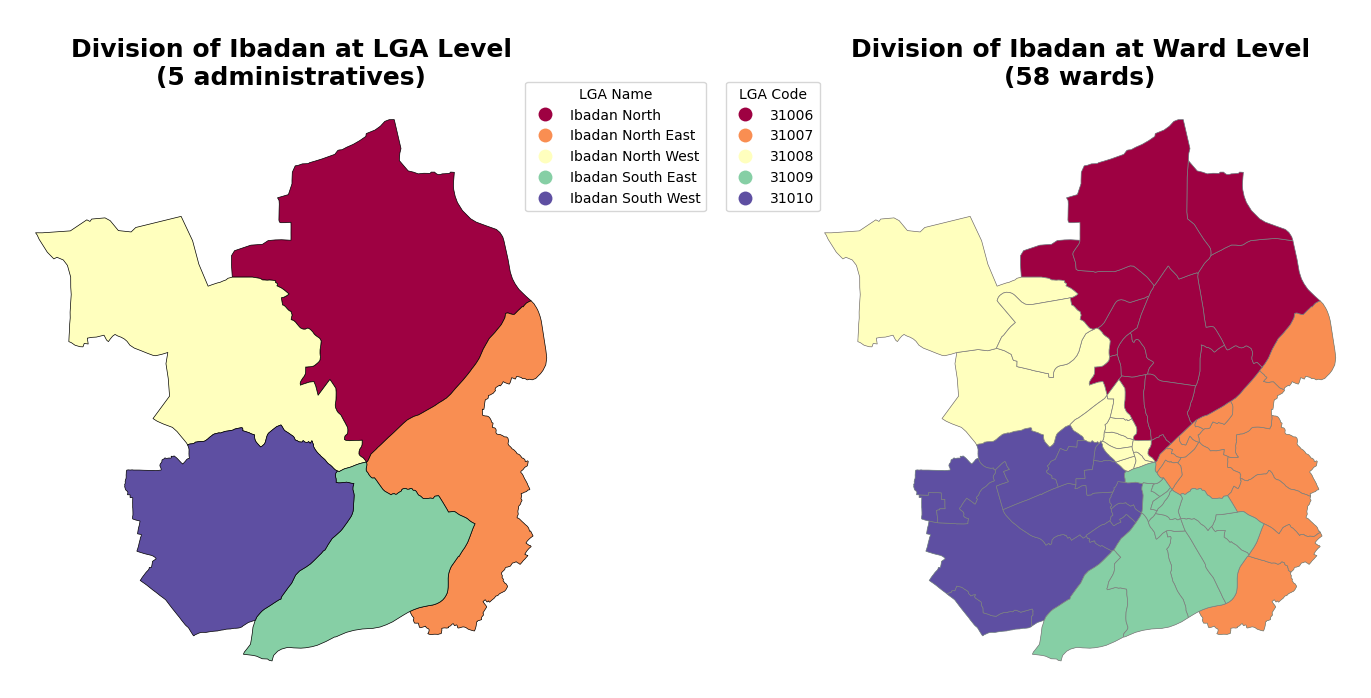

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ib_lga1.plot(ax=ax[0], column="LGAName", cmap="Spectral",
                   legend=True, legend_kwds={'bbox_to_anchor': (1.25, 1.03), "title": "LGA Name"},
                   edgecolor="k", linewidth=0.5)
ib_lga2.plot(ax=ib_lga1.plot(ax=ax[1], column="LGAName", legend=False),
                   column="LGACode", cmap="Spectral", legend=True,
                   legend_kwds={'bbox_to_anchor': (.05, 1.03), "title": "LGA Code"}, 
                   edgecolor="gray", linewidth=0.5)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_lga1.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_lga2.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


### New Settlement Types

In [38]:
filename = "../data-in/Ibadan_centoids_data.csv"
new_centroids = pd.read_csv(filename, index_col=0)
new_centroids.head()


,settlement_type_new,Ward,ea_numbers_new,longitude,latitude
1,Informal,AGUGU,AGUGU_001/012,3.919233,7.385282
2,Informal,AGUGU,AGUGU_003/022,3.920601,7.383531
3,Informal,AGUGU,AGUGU_004/035,3.926174,7.379370
4,Informal,AGUGU,AGUGU_005/032,3.920879,7.391955
5,Informal,AGUGU,AGUGU_009/014,3.922697,7.379974


In [39]:
new_centroids.Ward.unique()


array(['AGUGU', 'BASHORUN', 'CHALLENGE', 'OLOGUNERU'], dtype=object)

#### Make geometry `POINT(x, y)` to ease the visualization of campaign locations

In [40]:
points = [Point(x, y) for x, y in zip(new_centroids["longitude"], new_centroids["latitude"])]
geo_df = gpd.GeoDataFrame(new_centroids, geometry=points)

###
geo_df.head()


,settlement_type_new,Ward,ea_numbers_new,longitude,latitude,geometry
1,Informal,AGUGU,AGUGU_001/012,3.919233,7.385282,POINT (3.91923 7.38528)
2,Informal,AGUGU,AGUGU_003/022,3.920601,7.383531,POINT (3.92060 7.38353)
3,Informal,AGUGU,AGUGU_004/035,3.926174,7.379370,POINT (3.92617 7.37937)
4,Informal,AGUGU,AGUGU_005/032,3.920879,7.391955,POINT (3.92088 7.39195)
5,Informal,AGUGU,AGUGU_009/014,3.922697,7.379974,POINT (3.92270 7.37997)


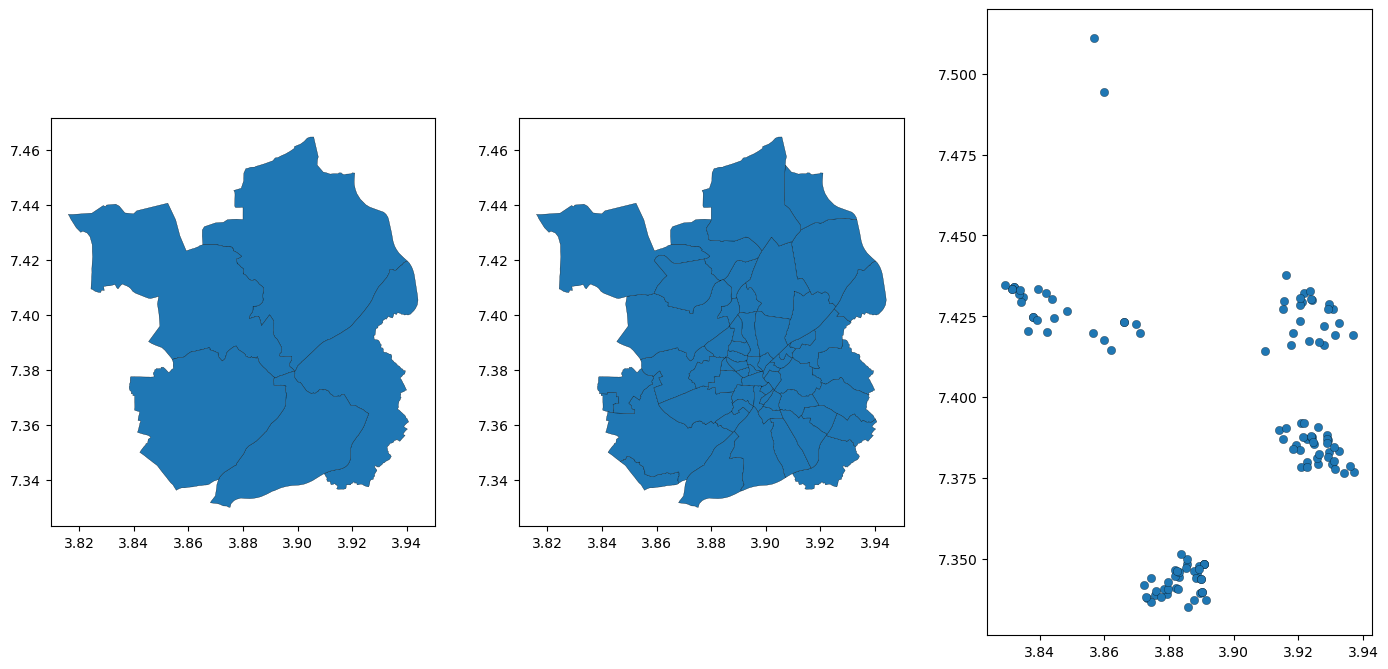

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(14, 8))

ib_lga1.plot(ax=ax[0], legend=True, edgecolor="k", linewidth=0.2)
ib_lga2.plot(ax=ax[1], legend=False, edgecolor="k", linewidth=0.2)
geo_df.plot(ax=ax[2], legend=False, edgecolor="k", linewidth=0.2)

fig.tight_layout();


#### Place the centroids - `POINT(x, y)` - on Ibadan LGA/Ward map(s)   

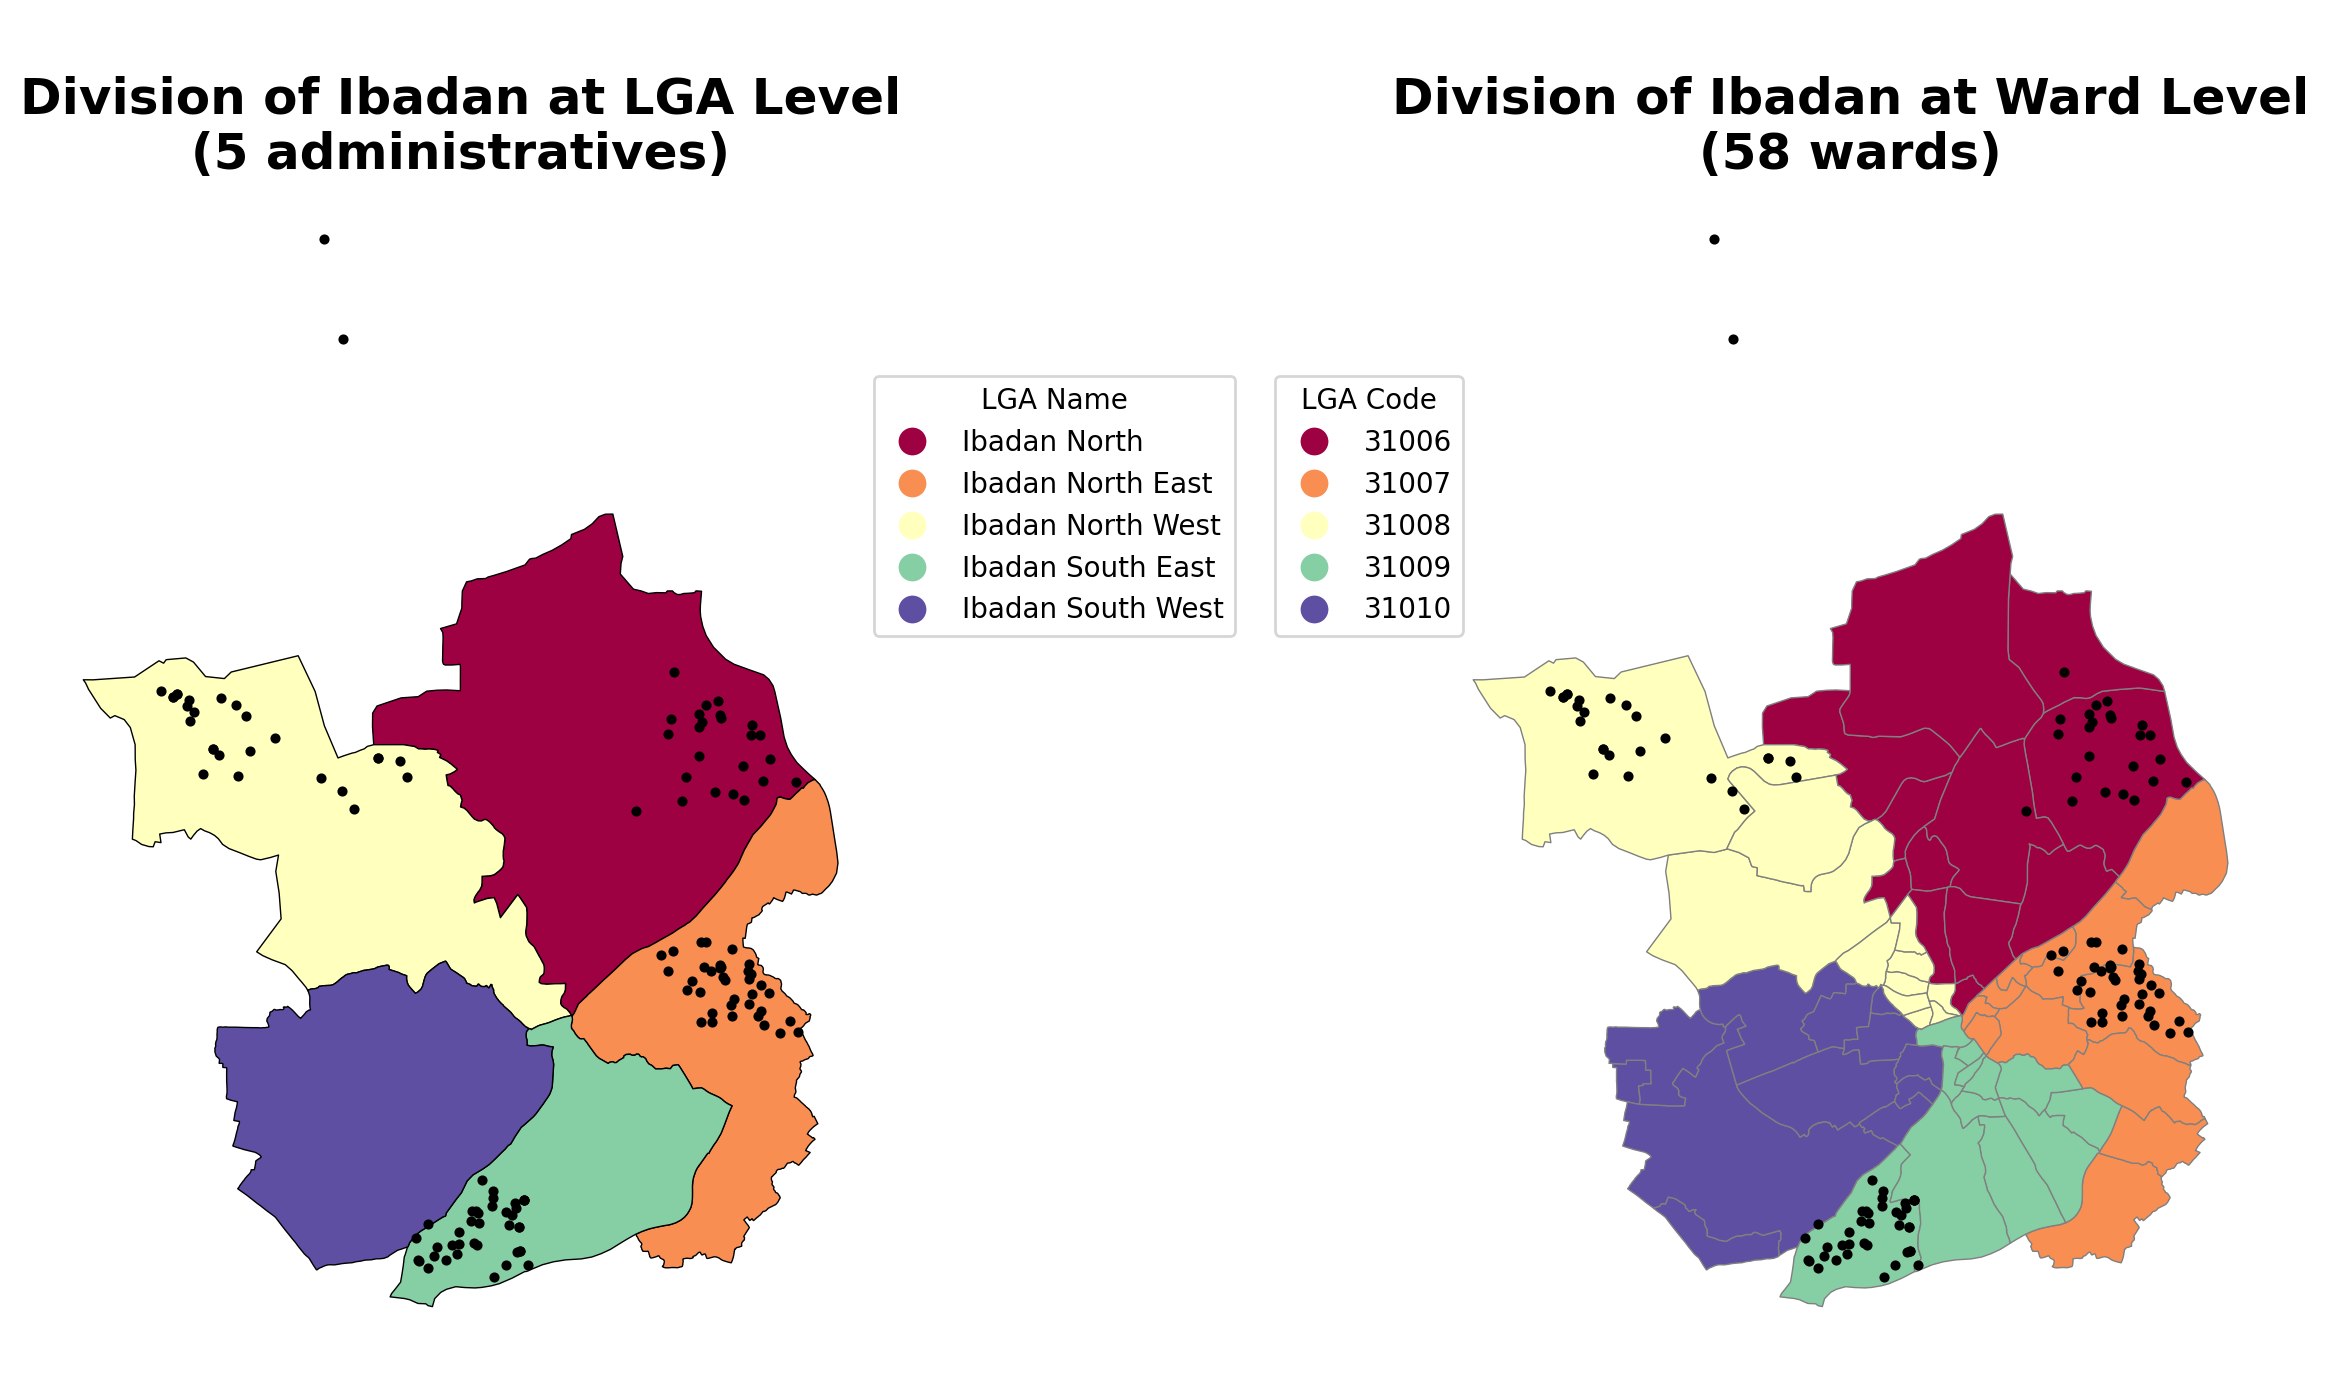

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7), dpi=200)

ib_lga1.plot(ax=ax[0], column="LGAName", cmap="Spectral",
             legend=True, legend_kwds={'bbox_to_anchor': (1.45, .85), "title": "LGA Name"},
             edgecolor="k", linewidth=0.5)
ib_lga2.plot(ax=ib_lga1.plot(ax=ax[1], column="LGAName", legend=False),
             column="LGACode", cmap="Spectral", legend=True,
             legend_kwds={'bbox_to_anchor': (.05, .85), "title": "LGA Code"}, 
             edgecolor="gray", linewidth=0.5)
###
geo_df.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
geo_df.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
    ax[1].spines[edge].set_visible(False)


ax[0].set_title(f"\nDivision of Ibadan at LGA Level\n({ib_lga1.LGAName.unique().size} administratives)", fontdict={"size": 18, "weight": "bold"})
ax[1].set_title(f"\nDivision of Ibadan at Ward Level\n({ib_lga2.WardName.unique().size} wards)", fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


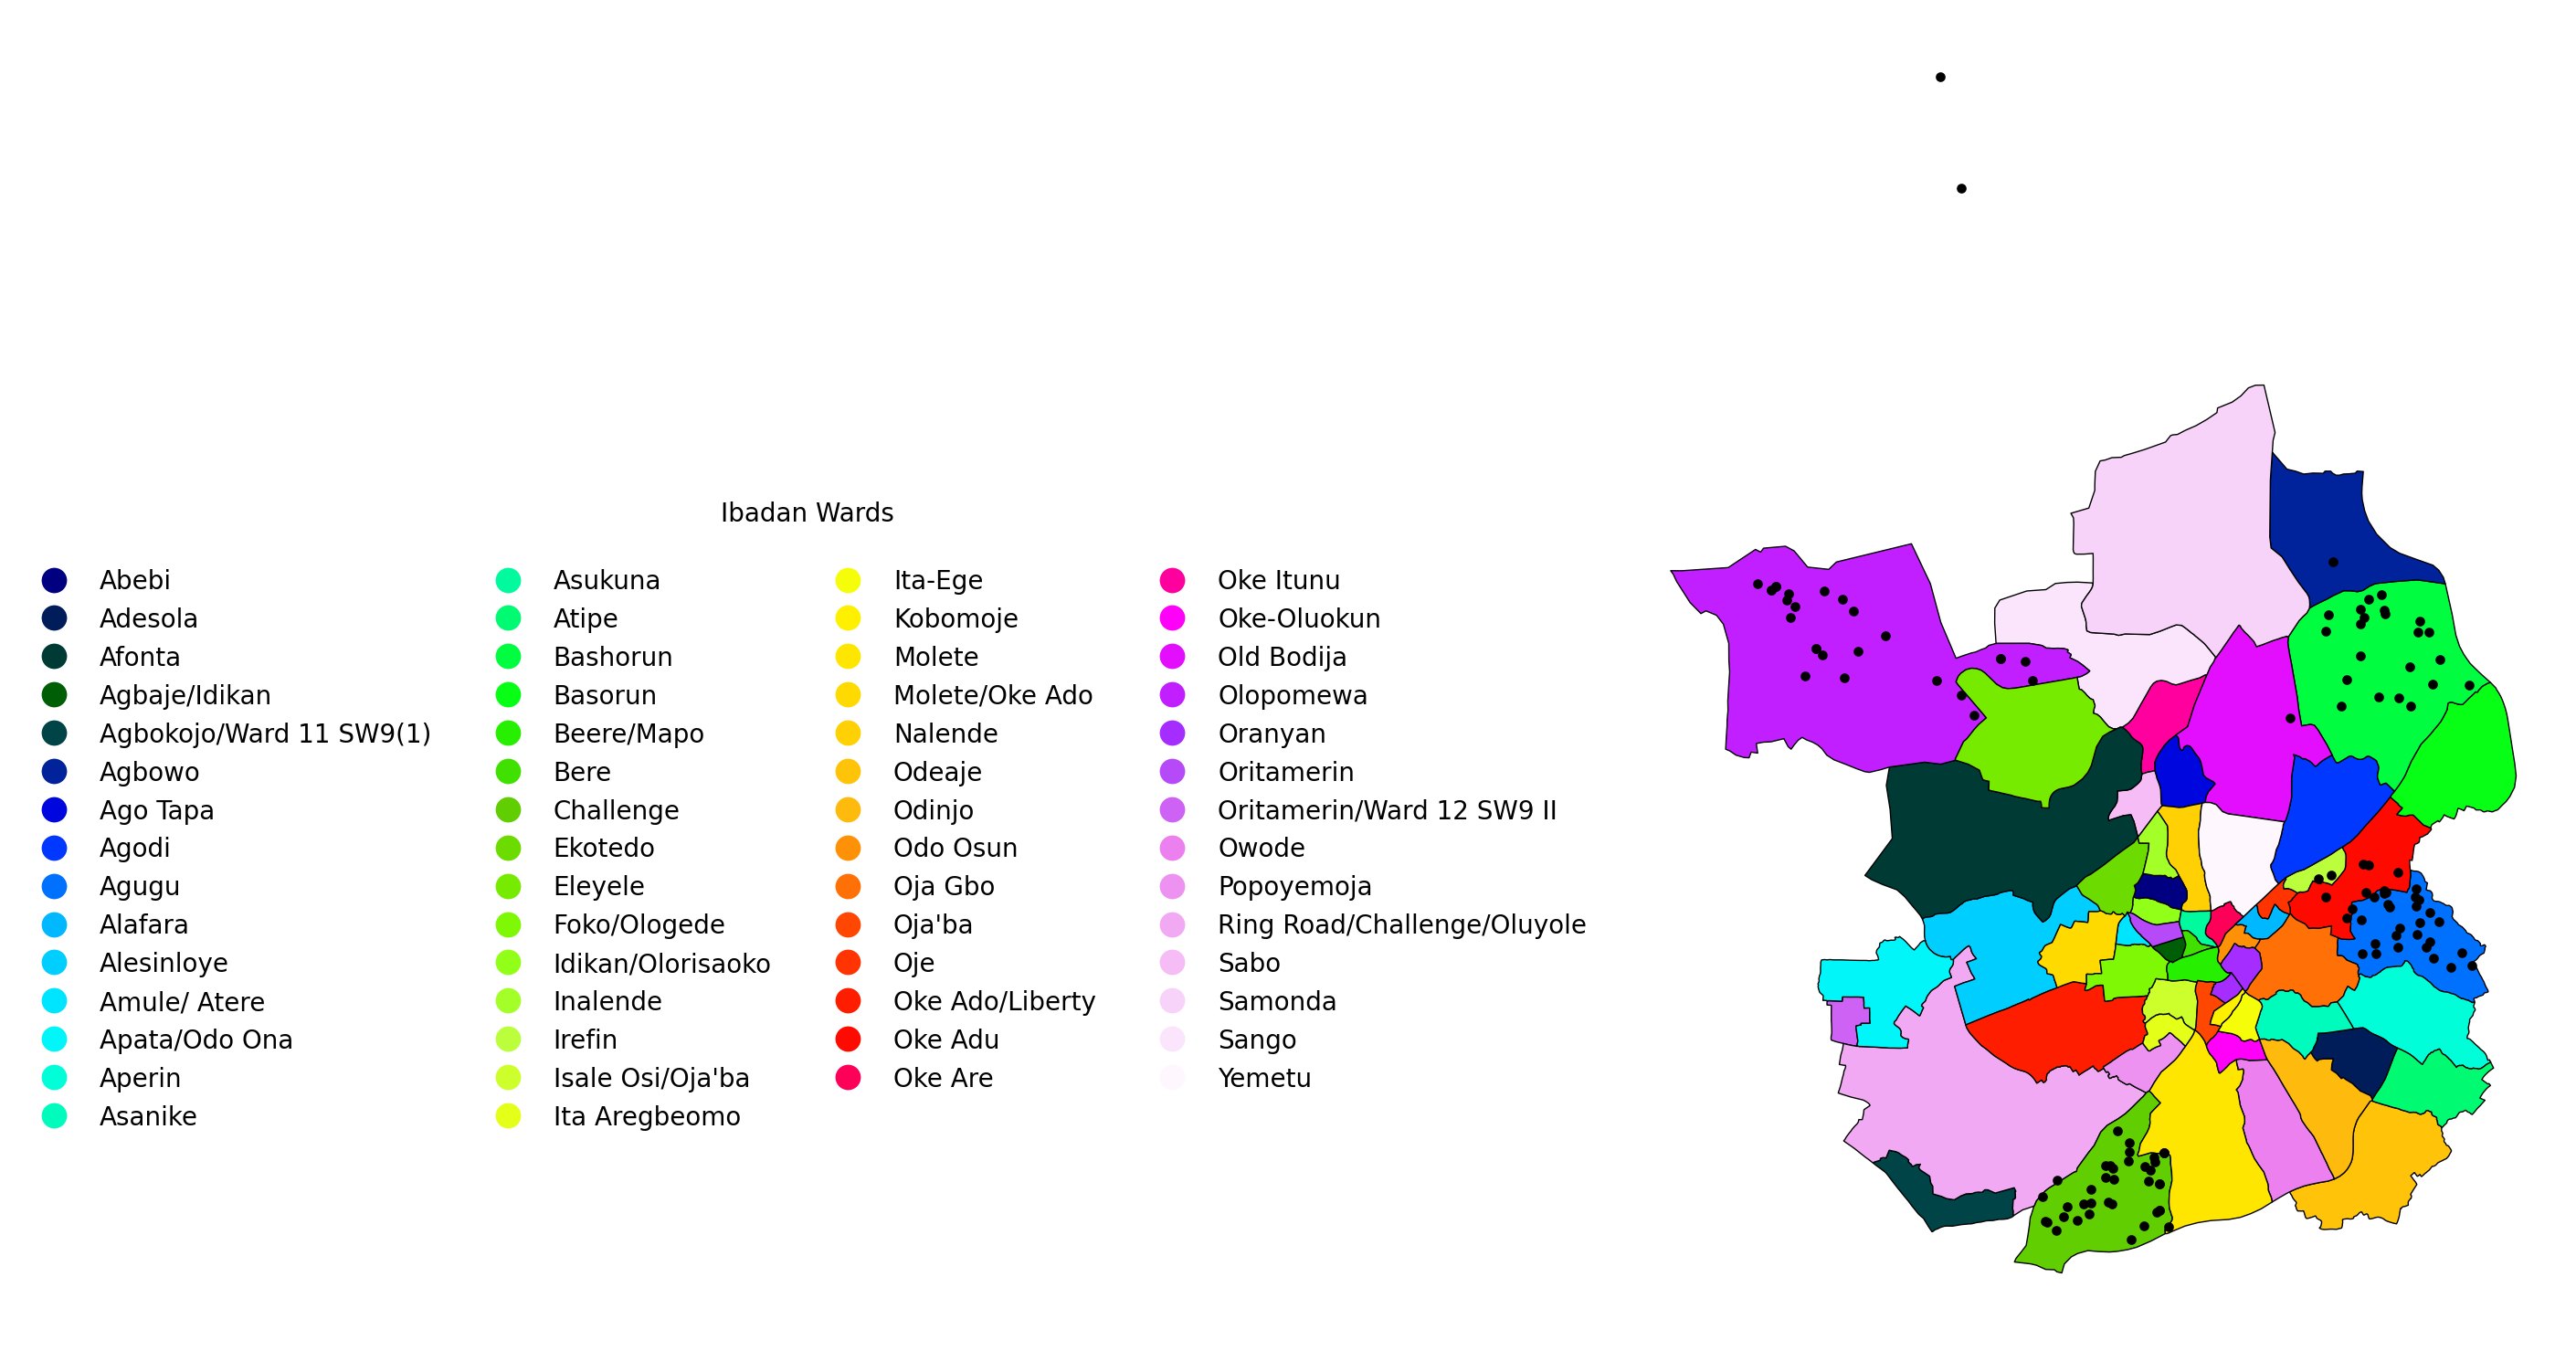

In [113]:
fig, ax = plt.subplots(figsize=(12, 9), dpi=200)
ib_lga2.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.65),
                          "ncol": 4,
                          "title": f"Ibadan Wards\n", "edgecolor": (1, 1, 1, 0.1)},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)
geo_df.plot(ax=ax, marker="o", markersize=8, legend=True, color="k")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
# ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();
### Save the figure
sfig = "Ibadan_new_centroids.pdf"
fig.savefig(f"../assets/{sfig}", bbox_inches='tight', dpi=300)


In [109]:
geo_df.sort_values("latitude")


,settlement_type_new,Ward,ea_numbers_new,longitude,latitude,geometry
86,Formal,CHALLENGE,CHALLENGE_041/013,3.885773,7.335068,POINT (3.88577 7.33507)
66,Informal,CHALLENGE,CHALLENGE_011/029,3.874462,7.336565,POINT (3.87446 7.33656)
91,Informal,CHALLENGE,CHALLENGE_044/031,3.891438,7.337091,POINT (3.89144 7.33709)
84,Informal,CHALLENGE,CHALLENGE_039/007,3.887648,7.337195,POINT (3.88765 7.33720)
63,Informal,CHALLENGE,CHALLENGE_006/009,3.873034,7.337766,POINT (3.87303 7.33777)
...,...,...,...,...,...,...
102,Formal,OLOGUNERU,OLOGUNERU_002/018,3.831853,7.434109,POINT (3.83185 7.43411)
127,Informal,OLOGUNERU,OLOGUNERU_051/002,3.829108,7.434513,POINT (3.82911 7.43451)
42,Slum,BASHORUN,BASHORUN_035/022,3.916271,7.437832,POINT (3.91627 7.43783)
108,Formal,OLOGUNERU,OLOGUNERU_010/032,3.860007,7.494360,POINT (3.86001 7.49436)


In [107]:
geo_df2 = geo_df.sort_values("latitude").iloc[:-2, :]


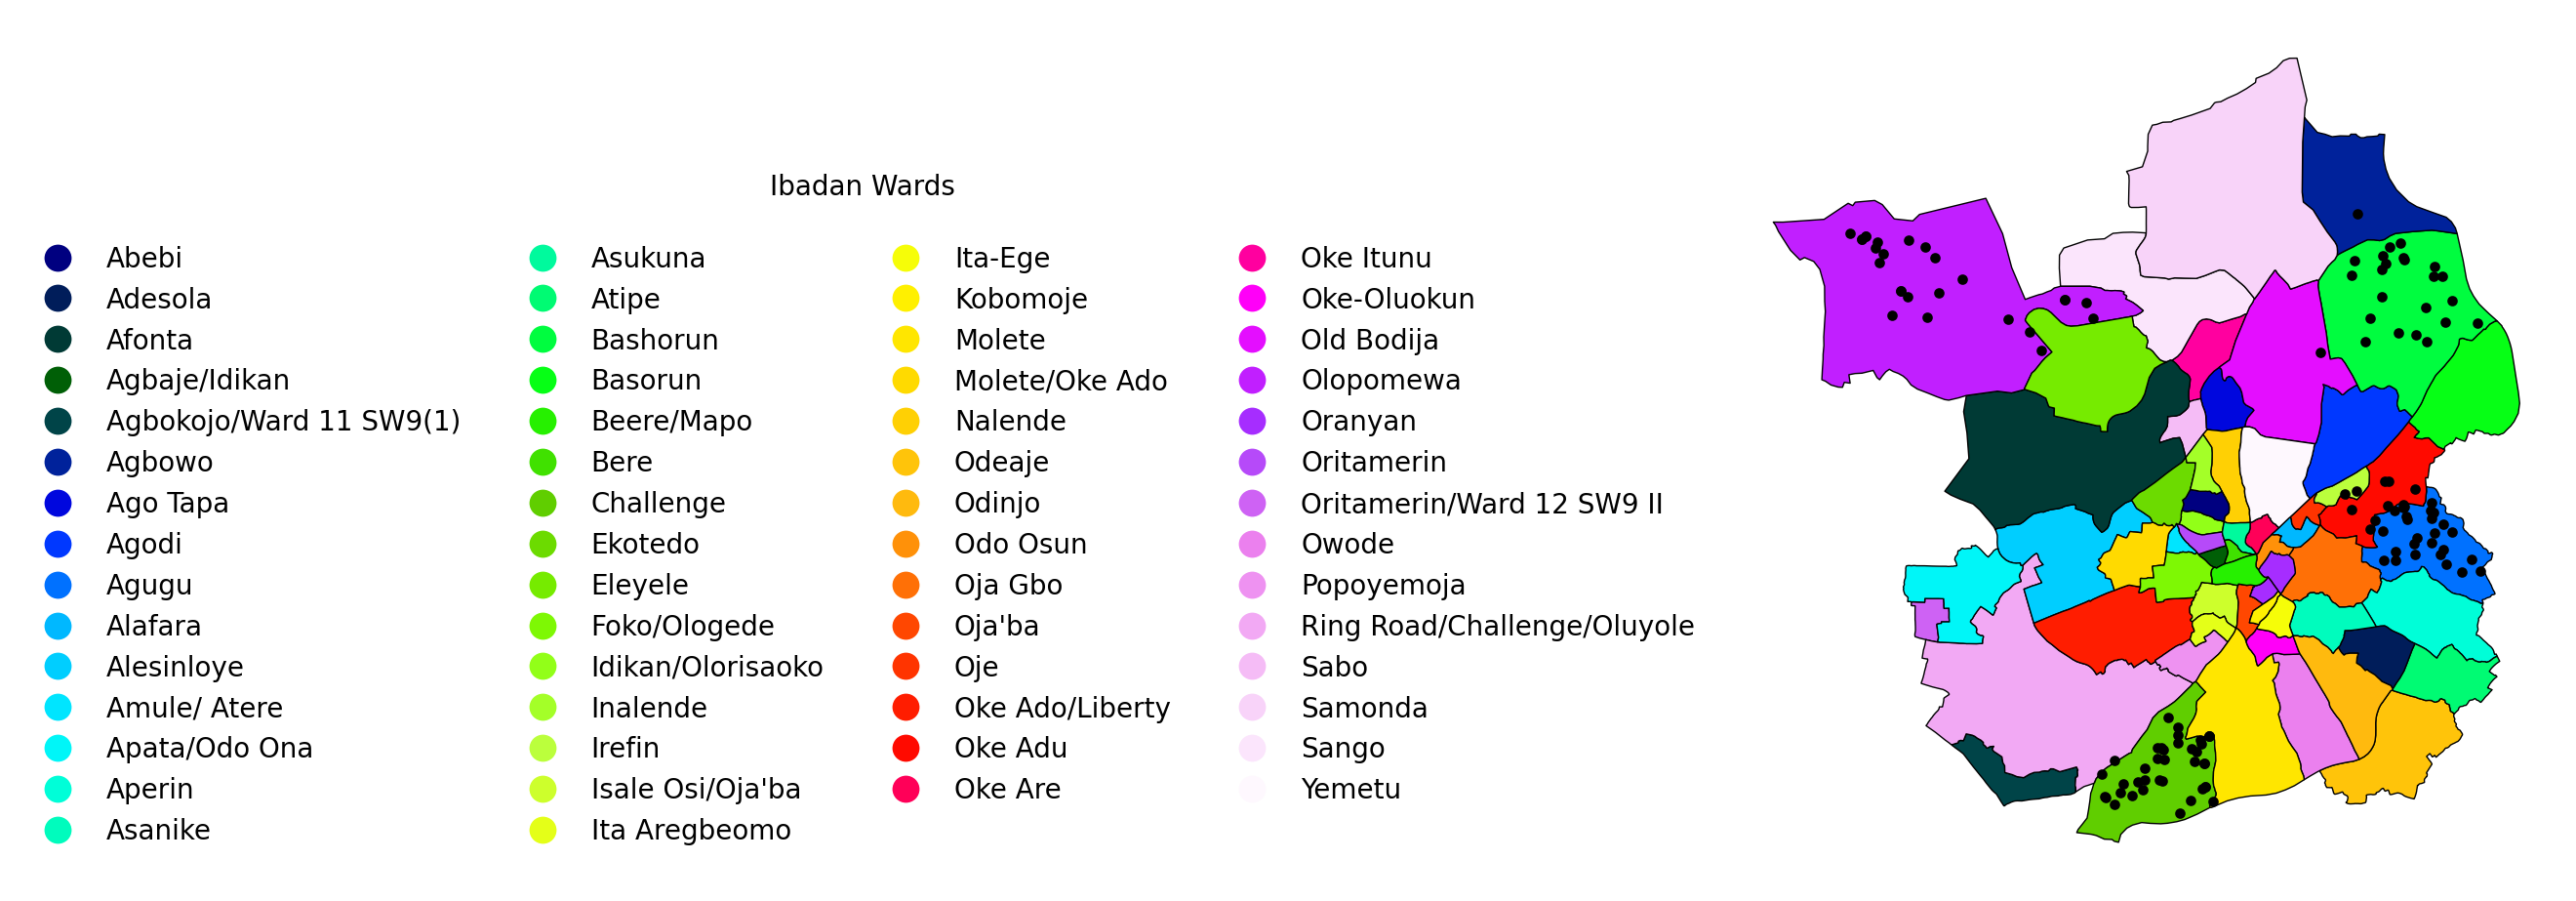

In [111]:
fig, ax = plt.subplots(figsize=(12, 9), dpi=200)
ib_lga2.plot(ax=ax, column="WardName", legend=True,
             legend_kwds={'bbox_to_anchor': (-0.02, 0.85),
                          "ncol": 4,
                          "title": f"Ibadan Wards\n", "edgecolor": (1, 1, 1, 0.1)},
             cmap="gist_ncar", edgecolor="k", linewidth=0.5)
geo_df2.plot(ax=ax, marker="o", markersize=8, legend=True, color="k")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)
# ax.set_title("\nIbadan City", fontdict={"size": 20, "weight": "bold"})

fig.tight_layout();


### Selecting areas of interest (AOI)

Based on the two figures above, I'm going to narrow down the investigation on only two local government administrative (LGA) areas:

1. Abadan North
2. Ibadan North East

According to the background knowledge of the project, the campaign locations (black dots, see the two figures above) in these two LGA areas correspond to Ibadan wards:

1. Bashurun (in the LGA, Abadan North)
2. Agugu (in the LGA, Ibadan North East)



In [160]:
ib_lga2


,StateCode,WardCode,WardName,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
0,OY,OYSINE01,Agugu,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
1,OY,OYSINE02,Alafara,31007,Yes,INEC,2019-03-16,fa5a252f-028e-4685-ae31-fb8859db8512,NIE OYS AGG,"POLYGON ((3.90645 7.38073, 3.90619 7.38071, 3...."
2,OY,OYSINE11,Oke Adu,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
3,OY,OYSINE09,Oja Gbo,31007,Yes,INEC,2019-03-16,5ebd3bb8-f111-495e-8055-2f3fd9f83906,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90998 7.38441, 3...."
4,OY,OYSINE05,Basorun,31007,Yes,INEC,2019-03-16,1c808ab3-2334-47f8-a9f9-81f36a6098fe,NIE OYS AGG,"POLYGON ((3.93780 7.41798, 3.93788 7.41805, 3...."
5,OY,OYSINE08,Odo Osun,31007,Yes,INEC,2019-03-16,e51d0e35-b1fb-4551-a073-8b8fe6c8ad9a,NIE OYS AGG,"POLYGON ((3.89913 7.37960, 3.89928 7.37982, 3...."
6,OY,OYSINE12,Oranyan,31007,Yes,INEC,2019-03-16,b711ac97-377d-451d-8e5c-8e10224de2af,NIE OYS AGG,"POLYGON ((3.90143 7.37999, 3.90159 7.37989, 3...."
7,OY,OYSINE10,Oje,31007,Yes,INEC,2019-03-16,e41d73d8-f800-480b-acdf-ad2e5f1074a3,NIE OYS AGG,"POLYGON ((3.90573 7.38680, 3.90709 7.38811, 3...."
8,OY,OYSINE06,Irefin,31007,Yes,INEC,2019-03-16,50261756-f407-402c-8a2a-3bb2481c37c2,NIE OYS AGG,"POLYGON ((3.91000 7.39042, 3.91075 7.39082, 3...."
9,OY,OYSINE07,Odeaje,31007,Yes,INEC,2019-03-16,f810d1da-d343-42a4-a39a-b040a9c07ea5,NIE OYS AGG,"POLYGON ((3.91950 7.33837, 3.91949 7.33837, 3...."


#### Extraction of LGA of interest: Ibadan North & Ibadan North East

In [148]:
### Extract Ibadan North & Ibadan North East LGAs
ibadan_north = ib_lga2[ib_lga2.LGACode=="31006"]
ibadan_north_east = ib_lga2[ib_lga2.LGACode=="31007"]
ibadan_north_west = ib_lga2[ib_lga2.LGACode=="31008"]
ibadan_south_east = ib_lga2[ib_lga2.LGACode=="31009"]

### Extract Aguru and Bashorun EAs 
Agugu = geo_df2[geo_df2.Ward=="AGUGU"].copy()
Bashorun = geo_df2[geo_df2.Ward=="BASHORUN"].copy()
Challenge = geo_df2[geo_df2.Ward=="CHALLENGE"].copy()
Ologuneru = geo_df2[geo_df2.Ward=="OLOGUNERU"].copy()


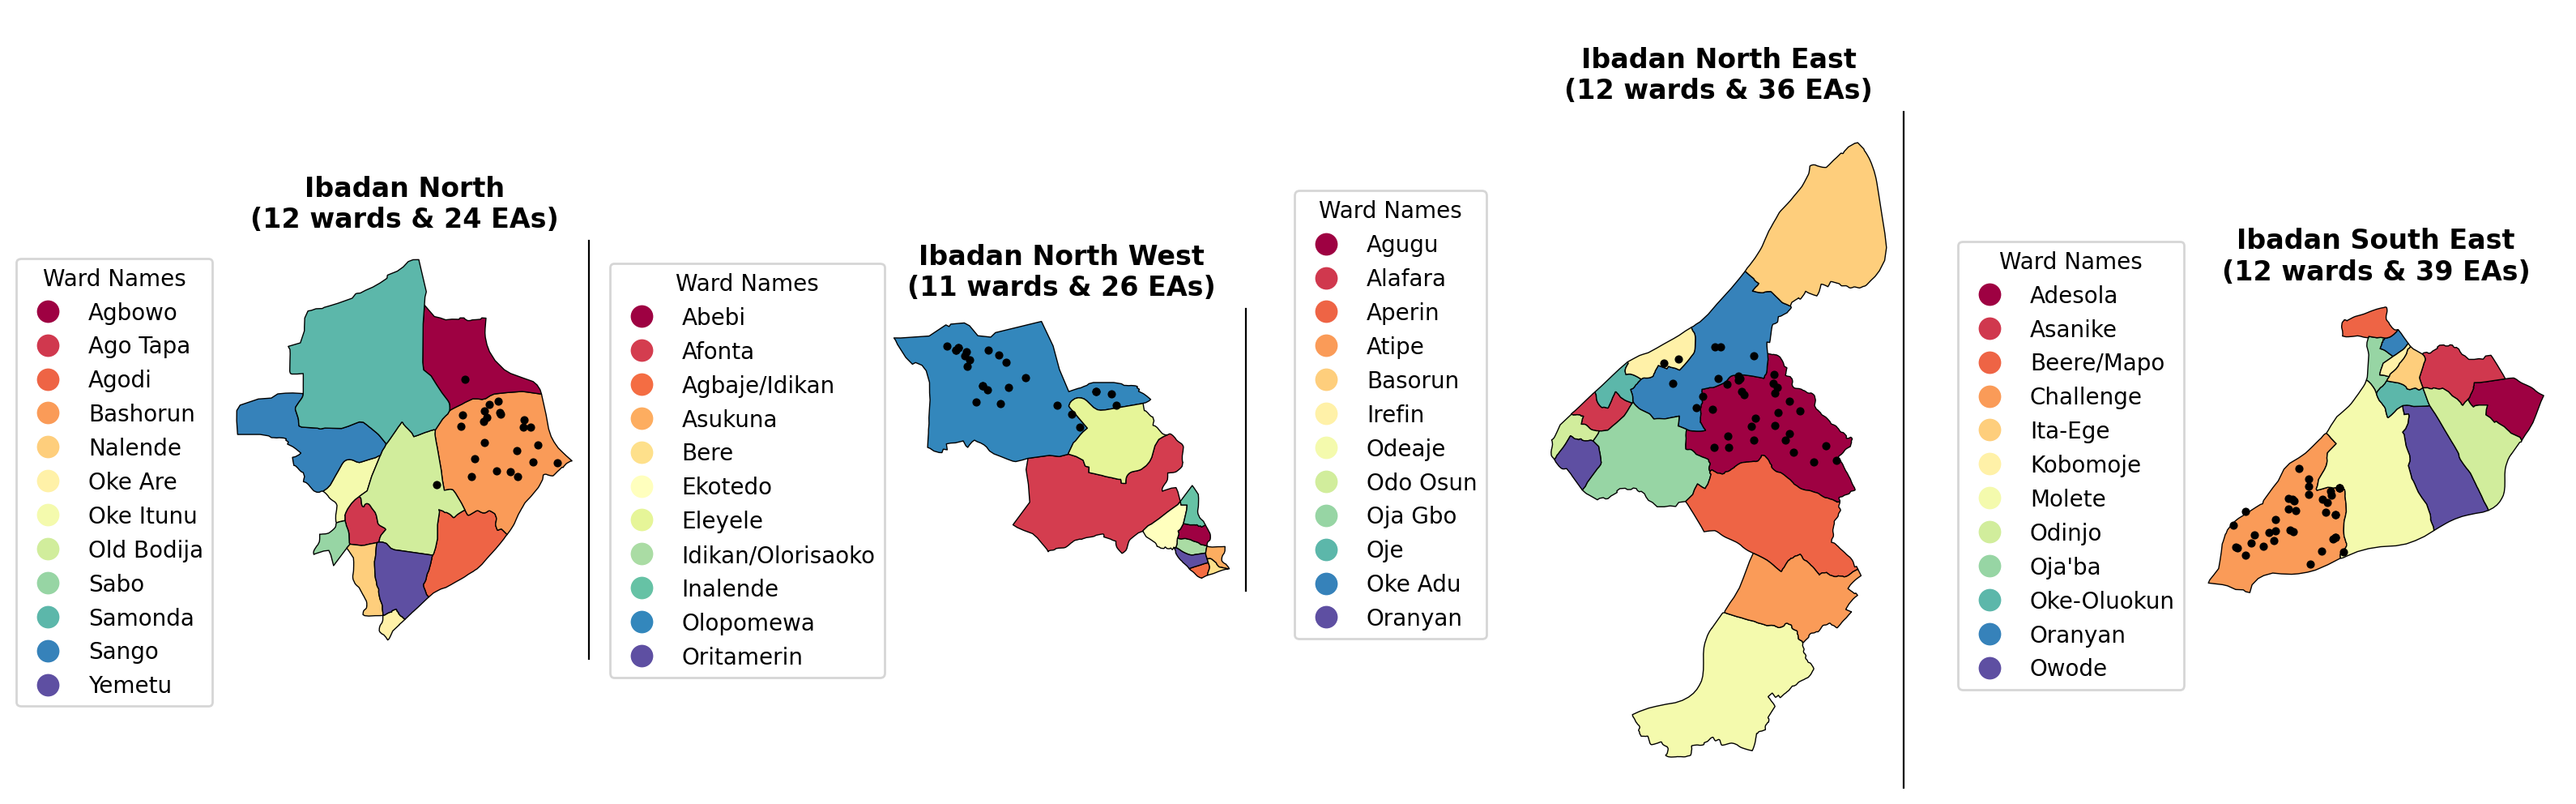

In [151]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6), dpi=200)

ibadan_north.plot(ax=ax[0], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.01, .985), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
ibadan_north_west.plot(ax=ax[1], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.05, 1.2), "ncol": 1, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
ibadan_north_east.plot(ax=ax[2], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (-.1, .9), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
ibadan_south_east.plot(ax=ax[3], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.01, 1.2), "ncol": 1, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
Ologuneru.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax[2], marker="o", markersize=7, legend=True, color="k")
Challenge.plot(ax=ax[3], marker="o", markersize=7, legend=True, color="k")
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
###
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
###
for edge in ["top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[1].spines[edge].set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[2].spines[edge].set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[3].spines[edge].set_visible(False)


ax[0].set_title(f"\nIbadan North\n({ibadan_north.WardName.unique().size} wards & {Bashorun.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[1].set_title(f"\nIbadan North West\n({ibadan_north_west.WardName.unique().size} wards & {Ologuneru.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[2].set_title(f"\nIbadan North East\n({ibadan_north_east.WardName.unique().size} wards & {Agugu.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[3].set_title(f"\nIbadan South East\n({ibadan_south_east.WardName.unique().size} wards & {Challenge.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})

fig.tight_layout();


#### Extraction of Wards of interest

Based of the two figures above, the main Wards of interest within the two LGAs of interest are the following:
1. LGA 1 - Ibadan North:
   * Bashorun
   * Agodi
2. LGA 2 – Ibadan North East:
   * Agugu
   * Aperin
   * Oke Adu
   * Basorun (due to the overlap with 3 EAs from LGA 1 figure)

In [152]:
### Ibadan North
Bashorun_LGA = ibadan_north[ibadan_north.WardName=="Bashorun"].copy()
Agbowo_LGA = ibadan_north[ibadan_north.WardName=="Agbowo"].copy()
OldBodija_LGA = ibadan_north[ibadan_north.WardName=="Old Bodija"].copy()

### Ibadan North East
Agugu_LGA = ibadan_north_east[ibadan_north_east.WardName=="Agugu"].copy()
Oke_Adu_LGA = ibadan_north_east[ibadan_north_east.WardName=="Oke Adu"].copy()
Irefin_LGA = ibadan_north_east[ibadan_north_east.WardName=="Irefin"].copy()

### Ibadan North West
Olopomewa_LGA = ibadan_north_west[ibadan_north_west.WardName=="Olopomewa"].copy()

### Ibadan South East
Challenge_LGA = ibadan_south_east[ibadan_south_east.WardName=="Challenge"].copy()

### Combine into one data
Ward_ib_north_AOI = pd.concat([Bashorun_LGA, Agbowo_LGA, OldBodija_LGA])
Ward_ib_north_east_AOI = pd.concat([Agugu_LGA, Oke_Adu_LGA, Irefin_LGA])
Ward_ib_north_west_AOI = Olopomewa_LGA.copy()
Ward_ib_south_east_AOI = Challenge_LGA.copy()
Ward_ib_AOI = pd.concat([Bashorun_LGA, Agbowo_LGA,
                         OldBodija_LGA, Agugu_LGA,
                         Oke_Adu_LGA, Irefin_LGA,
                         Olopomewa_LGA, Challenge_LGA])


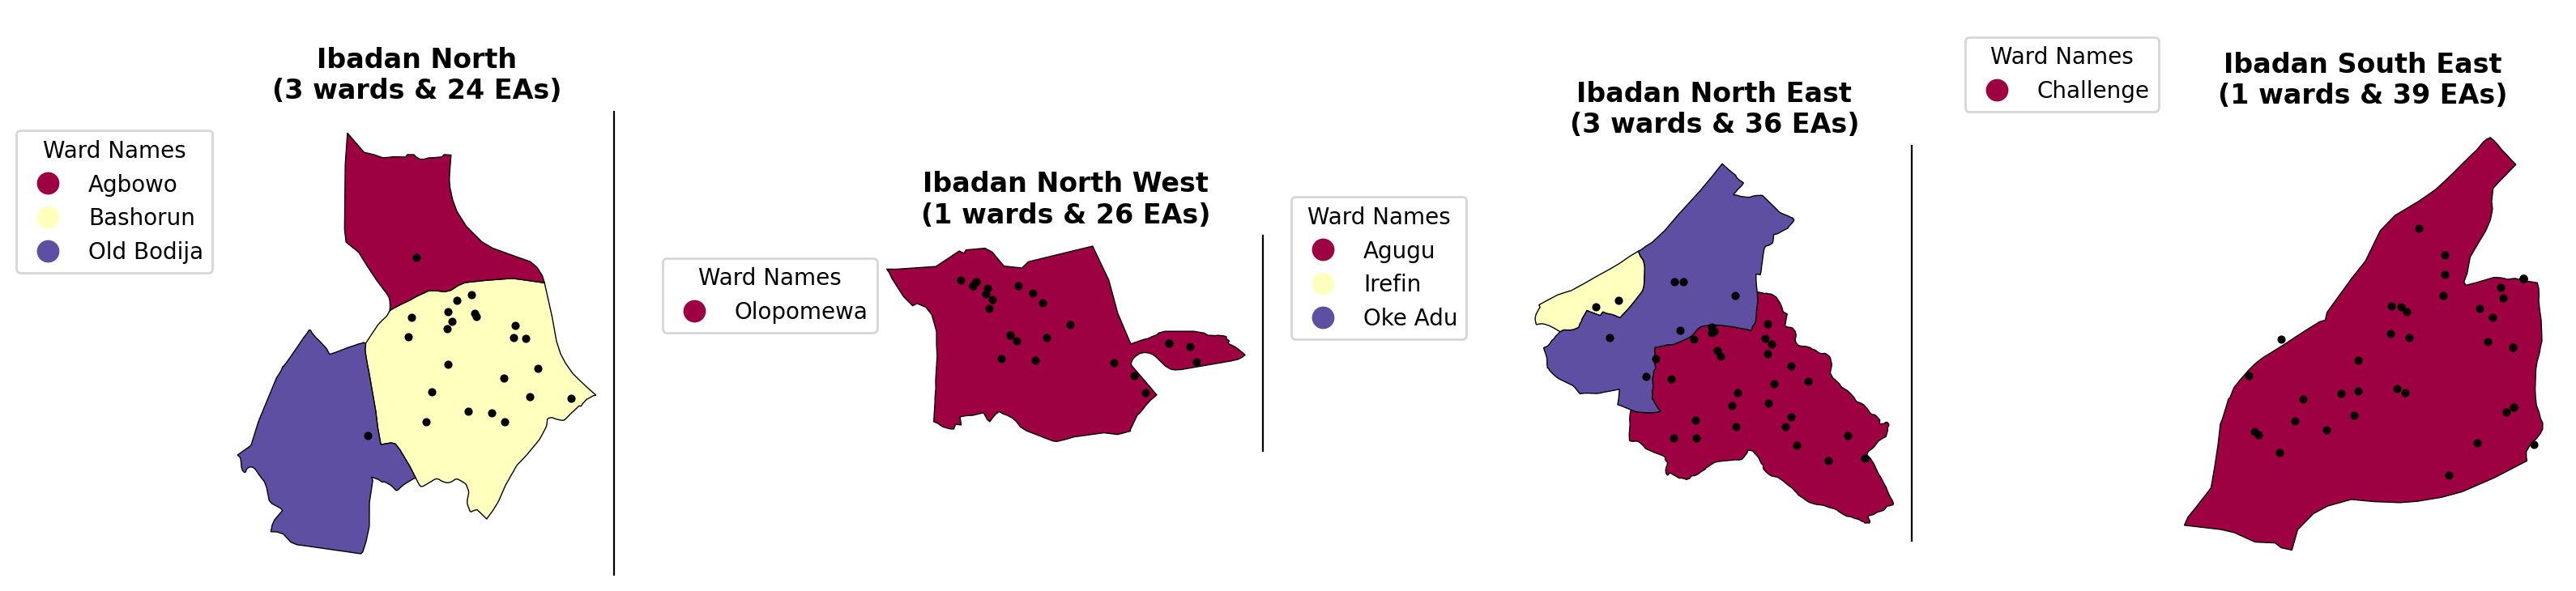

In [153]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6), dpi=200)

Ward_ib_north_AOI.plot(ax=ax[0], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.01, .985), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
Ward_ib_north_west_AOI.plot(ax=ax[1], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.05, .95), "ncol": 1, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
Ward_ib_north_east_AOI.plot(ax=ax[2], column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (-.1, .9), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
Ward_ib_south_east_AOI.plot(ax=ax[3], column="WardName", cmap="Spectral", legend=True,
                       legend_kwds={'bbox_to_anchor': (.01, 1.2), "ncol": 1, "title": "Ward Names"},
                       edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax[0], marker="o", markersize=7, legend=True, color="k")
Ologuneru.plot(ax=ax[1], marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax[2], marker="o", markersize=7, legend=True, color="k")
Challenge.plot(ax=ax[3], marker="o", markersize=7, legend=True, color="k")
###
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
###
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
###
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
###
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
###
for edge in ["top", "bottom", "left"]:
    ax[0].spines[edge].set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[1].spines[edge].set_visible(False)
for edge in ["top", "bottom", "left"]:
    ax[2].spines[edge].set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax[3].spines[edge].set_visible(False)


ax[0].set_title(f"\nIbadan North\n({Ward_ib_north_AOI.WardName.unique().size} wards & {Bashorun.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[1].set_title(f"\nIbadan North West\n({Ward_ib_north_west_AOI.WardName.unique().size} wards & {Ologuneru.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[2].set_title(f"\nIbadan North East\n({Ward_ib_north_east_AOI.WardName.unique().size} wards & {Agugu.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})
ax[3].set_title(f"\nIbadan South East\n({Ward_ib_south_east_AOI.WardName.unique().size} wards & {Challenge.ea_numbers_new.unique().size} EAs)",
                fontdict={"size": 12, "weight": "bold"})

fig.tight_layout();


#### Visualize combined Wards and EAs of interest

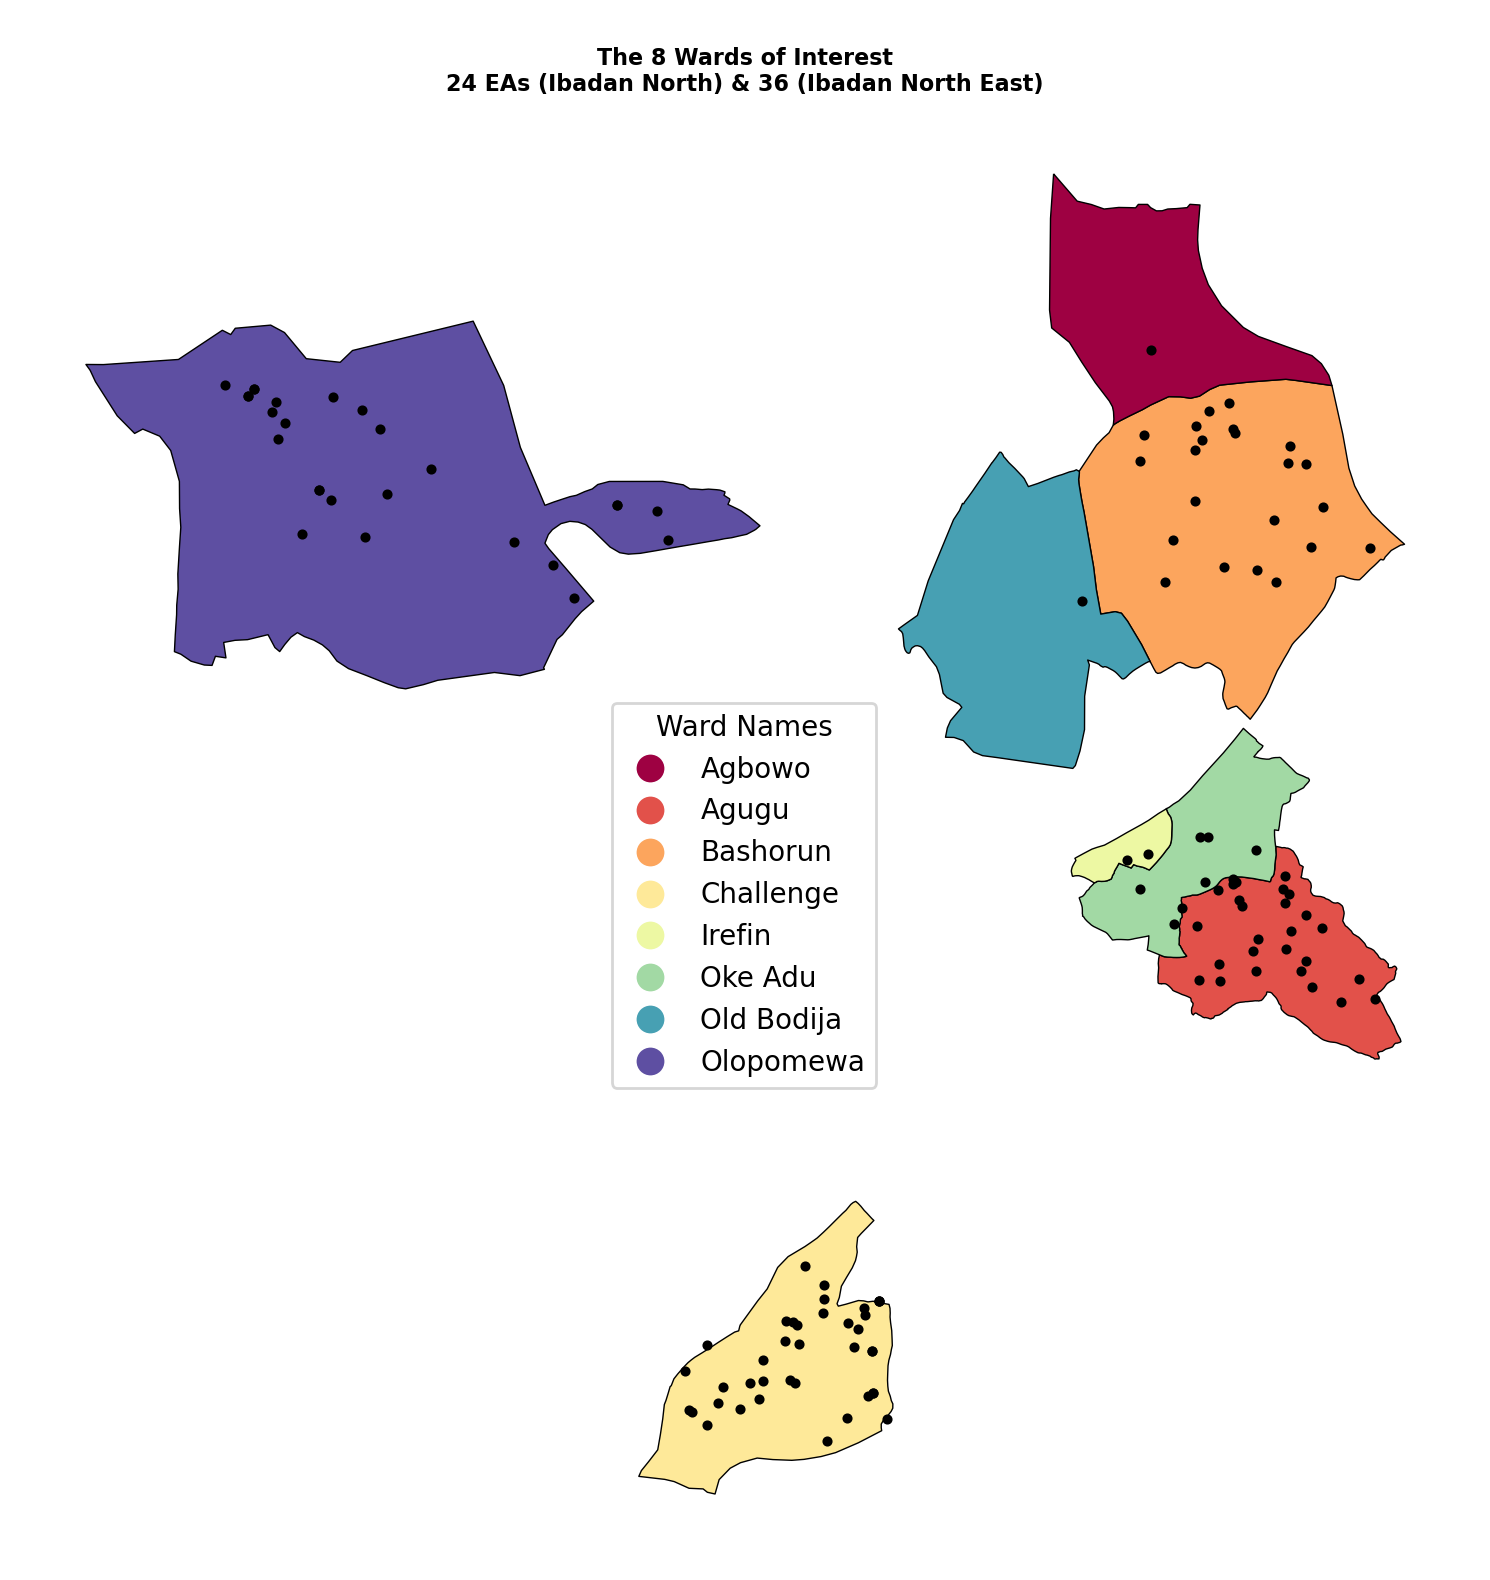

In [159]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

Ward_ib_AOI.plot(ax=ax, column="WardName", cmap="Spectral", legend=True,
                  legend_kwds={'bbox_to_anchor': (.6, .6), "ncol": 1, "title": "Ward Names"},
                  edgecolor="k", linewidth=0.5)
###
Bashorun.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
Ologuneru.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
Agugu.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
Challenge.plot(ax=ax, marker="o", markersize=7, legend=True, color="k")
###
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ["right", "top", "bottom", "left"]:
    ax.spines[edge].set_visible(False)


ax.set_title(f"\nThe {Ward_ib_AOI.WardName.unique().size} Wards of Interest\n{Bashorun.ea_numbers_new.unique().size} EAs (Ibadan North) & {Agugu.ea_numbers_new.unique().size} (Ibadan North East)",
                fontdict={"size": 8, "weight": "bold"})
# ax.set_title(f"\nIbadan North East\n({Ward_ib_AOI.WardName.unique().size} wards & {Agugu.ea_code.unique().size} EAs)",
#                 fontdict={"size": 18, "weight": "bold"})
fig.tight_layout();


### Save the shapefiles of AOI for Satellite image extractions

In [42]:
### Base directory
shape_outdir = "../data-out/aoi-shapefiles"


In [161]:
Ward_ib_AOI.set_index("WardName")


,StateCode,WardCode,LGACode,Urban,Source,Timestamp,GlobalID,AMAPCODE,geometry
WardName,,,,,,,,,
Bashorun,OY,OYSIBN04,31006,Yes,INEC,2019-09-26,68e63cf2-7b09-4c12-931d-070738f24664,NIE OYS BDJ,"POLYGON ((3.92314 7.40708, 3.92313 7.40710, 3...."
Agbowo,OY,OYSIBN01,31006,Yes,INEC,2019-09-26,a09be264-854b-4d27-9206-cf1b17a1c6d0,NIE OYS BDJ,"POLYGON ((3.90713 7.45442, 3.90936 7.45185, 3...."
Old Bodija,OY,OYSIBN08,31006,Yes,INEC,2019-09-26,93b7ba2b-0784-4333-96ea-78f41408bed7,NIE OYS BDJ,"POLYGON ((3.91117 7.40833, 3.91034 7.40862, 3...."
Agugu,OY,OYSINE01,31007,Yes,INEC,2019-03-16,0c68a884-f471-48da-8843-0be263586f01,NIE OYS AGG,"POLYGON ((3.91744 7.38072, 3.91755 7.38068, 3...."
Oke Adu,OY,OYSINE11,31007,Yes,INEC,2019-03-16,d2d736a9-691b-44a7-b382-29756ee5f9d4,NIE OYS AGG,"POLYGON ((3.90994 7.38446, 3.90986 7.38450, 3...."
Irefin,OY,OYSINE06,31007,Yes,INEC,2019-03-16,50261756-f407-402c-8a2a-3bb2481c37c2,NIE OYS AGG,"POLYGON ((3.91000 7.39042, 3.91075 7.39082, 3...."
Olopomewa,OY,OYSINW10,31008,Yes,INEC,2019-09-26,e695bfdc-c490-4764-b4bb-c8421e70f79d,NIE OYS NRK,"POLYGON ((3.81638 7.43591, 3.81598 7.43647, 3...."
Challenge,OY,OYSISE04,31009,Yes,INEC,2019-09-26,8764057c-4772-4274-883e-a2a834ca8f9c,NIE OYS MAP,"POLYGON ((3.87759 7.34596, 3.87926 7.34826, 3...."


In [168]:
geo_df2.settlement_type_new.value_counts()


settlement_type_new
Informal    70
Formal      34
Slum        21
Name: count, dtype: int64

#### Make the shapefile data of AOI and save

In [170]:
### Ibadan North
Bashorun_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Bashorun/bashorun.shp")
Agbowo_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Agbowo/agbowo.shp")
OldBodija_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/OldBodija/oldbodija.shp")

### Ibadan North East
Agugu_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Agugu/agugu.shp")
Oke_Adu_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/OkeAdu/okeadu.shp")
Irefin_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Irefin/irefin.shp")

### Ibadan North West
Olopomewa_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Olopomewa/olopomewa.shp")

### Ibadan South East
Challenge_LGA[["WardName", "geometry"]].to_file("../data-out/new_aoi/Challenge/challenge.shp")

### Aggregate 
Ward_ib_AOI[["WardName", "geometry"]].to_file("../data-out/new_aoi/Aggregate/aggregate.shp")

### Centroids  
geo_df2.to_file("../data-out/new_aoi/Centroids/Ibadan_new_centroids.shp")


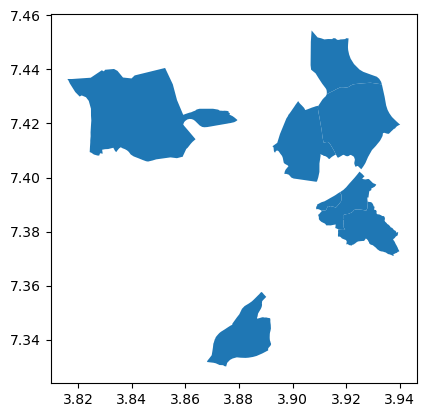

In [166]:
Ward_ib_AOI[["WardName", "geometry"]].plot();
